<a href="https://colab.research.google.com/github/nagamamo/international_finance/blob/main/3_foreign_direct_investment_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

第3回　外国直接投資のデータサイエンス：UNCTADデータの分析

　前回の説明通り、国際収支は「経常勘定」と「金融勘定」の両輪から構成されます。そして、金融勘定は、①外国直接投資、②国際証券投資、③その他投資（国際銀行融資）、④外貨準備の4項目から構成されます。本例では、①外国直接投資の分析例を示します。

　外国直接投資は対外直接投資、対内直接投資の2つに分類されます。ISバランスが貯蓄超過の場合は、より高い投資収益率を求めて前者が大きくなり、投資超過の場合は後者が大きくなります。

　1964年に設立された国連貿易開発会議(United Nations Conference on Trade and Investment: UNCTAD)は、外国直接投資統計を世界の国々から収集し、統計を対外公表しています。データは同機関のHPからExcelで入手することも可能ですが、本例は、1970年から現在までの国連全加盟国のバルクデータを一括取得し、プログラミングすることでの、分析例を示します。

1.　ライブラリの読み込み

　　記述統計用ライブラリpandasと図表作成のためのmatplotlibを使用します。

In [1]:
#[1]ライブラリの読み込み
import pandas as pd
import matplotlib.pyplot as plt

2．データの読み込み

　UNCTADのデータセンターhttps://unctadstat.unctad.org/wds/ReportFolders/reportFolders.aspx?sCS_ChosenLang=en
からバルクデータを入手し、このCSVファイルをgithubにアップロードします。その上で、1行目の記述によりこのデータを読み込み、pandasデータフレームとして保存します。3行目で最左列をインデックス化します。事前にURLにアップロードしておくことで、直接CSVファイルを読み込むよりも、迅速にデータが読み込めます。

In [2]:
#[2]データの読み込み
url = "https://github.com/nagamamo/data/blob/main/3_unctad_fdi_2023.csv?raw=true"#Git-hubからCSVデータの入手
data = pd.read_csv(url)#データフレームの作成
fdi = data.set_index("Year")#年をインデックスへ変更

3.　データ確認

　読み込んだデータの冒頭5行を表示します。この作業を行うことで、バルクデータに収録されたデータや変数名を後々把握することができます。出力結果は、全世界、アフガニスタン、アルジェリアの順に、対外直接投資、対内直接投資のデータが1970年から収録されていることがわかります。

In [ ]:
#[3]データの確認
fdi.head()

4.　国・地域リーグテーブルの作成

　本例では、2020年の対内直接投資（対GDP比）のデータを用い、直接投資受入規模が大きい国・地域から小さい国・地域への順に並べ替えます。

4.1　リーグテーブルの「年」

1行目において、locを用いて2020年のみのデータを抽出します。

4.2　対内直接投資と対外直接投資の選択

　2行目において、Directionを"1"にすることで対内直接投資を選択します。"2"は対外直接投資です。Modeはその年々の流出入額（フロー）である"8"を選択します。

4.3　変数名書換えとデータの並べ替え

　3行目で変数名を書き換え、4行目でsort_valuesを用いて降べきの順にデータを並べ替えます。結果を見ると、ケイマン諸島やルクセンブルクなどタクスヘブン国・地域に大規模な直接投資が流入していることがわかります。他方、これらの国・地域に匹敵する規模の対内直接投資を受け入れている地域が香港です。リーグテーブルの経年変化を見たい場合は、1行目の{2020]を他の年に変更すると、その年のリーグテーブルが作成できます。



In [ ]:
#[4]国・地域リーグテーブルの作成
df=fdi.loc[2020]
df=df[(df["Direction"] == 1)&(df["Mode"] == 8)]
df=df[['Economy Label','Percentage of Gross Domestic Product']]
df_s = df.sort_values(by='Percentage of Gross Domestic Product', ascending=False).head(150)
#df_s.rename(columns={'BN.CAB.XOKA.GD.ZS': 'IS_Balance per GDP'},inplace=True) #変数名の修正
df_s

5.　個別国の対外直接投資・対内直接投資の分析

5.1　対米直接投資

　本例では諸外国が米国に対して行ってきた対米直接投資のデータ抽出と記述統計、可視化の手順を示します。他国を分析する場合は、次のセルの国名を変更してください。また、対外直接投資を分析するときは、"Direction"==1を"Direction"==2に変更してください。

In [ ]:
#[4]国・地域データの抽出
usa=fdi[(fdi["Economy Label"] == "United States of America")&(fdi["Direction"] == 1)&(fdi["Mode"] == 8)]
usa

5.2　可視化

　次に抽出したデータを可視化します。これを見ると、第2回のデモで示した通り、世界最大の投資超過国、米国は、過去50年間、積極的に対米直接投資を受け入れることで、貯蓄不足を賄ってきたことがわかります。

Text(0, 0.5, 'Percent')

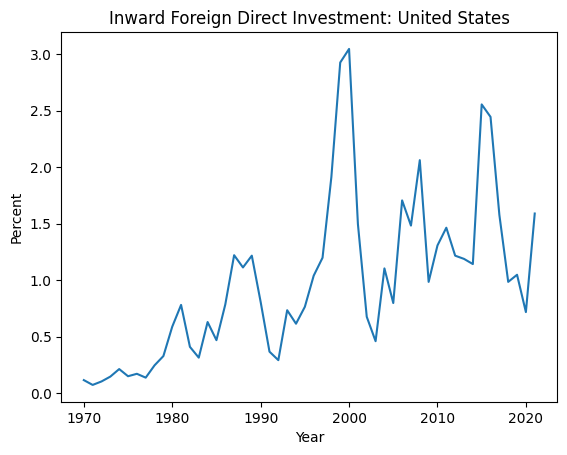

In [6]:
#[5]可視化
plt.plot(usa['Percentage of Gross Domestic Product'])
plt.title("Inward Foreign Direct Investment: United States")
plt.xlabel("Year")
plt.ylabel("Percent")